In [111]:
import pandas as pd

# Reading the data

In [112]:
df = pd.read_csv('data/income_data.csv')

In [113]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
 15  target          32561 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


## DISCLAIMER

In a real-world application, samples should be weighted by the fnlwgt column. We will ignore this here at our own peril.

## What is in the data?

<AxesSubplot:xlabel='age', ylabel='education-num'>

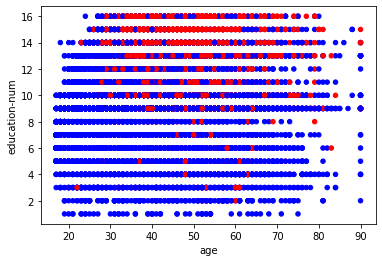

In [7]:
df.plot.scatter('age', 'education-num',
               c=['r' if t == 1 else 'b' for t in df.target])

## Balance in target

In [45]:
df['target'].mean() # always guessing 'no', we'll be right 3 times out of 4!

0.2408095574460244

# Feature Exploration and Processing

In [8]:
df[['hours-per-week', 'education-num']].iloc[10:20]

,hours-per-week,education-num
10,80,10
11,40,13
12,30,13
13,50,12
14,40,11
15,45,4
16,35,9
17,40,9
18,50,7
19,45,14


<AxesSubplot:ylabel='Frequency'>

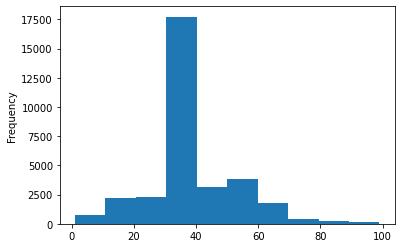

In [9]:
df['hours-per-week'].plot.hist()

In [42]:
df[df['hours-per-week'] == 40]['target'].mean()

0.2133797726227246

In [43]:
df[df['hours-per-week'] > 40]['target'].mean()

0.4024632084333577

In [44]:
df[df['hours-per-week'] < 40]['target'].mean()

0.09506634033234575

In [117]:
df.groupby(pd.cut(df['hours-per-week'], [0, 39, 40, 100]))['target'].mean()

hours-per-week
(0, 39]      0.095066
(39, 40]     0.213380
(40, 100]    0.402463
Name: target, dtype: float64

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [55]:
import matplotlib.pyplot as plt

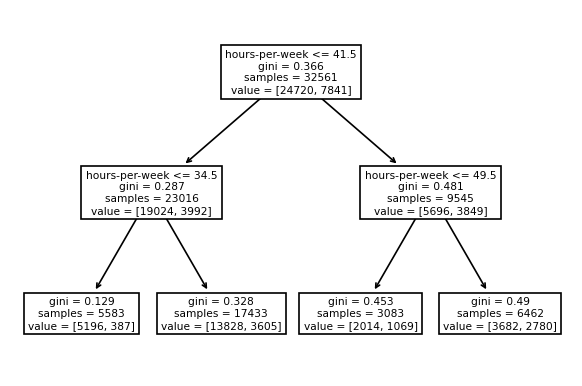

In [58]:
plt.figure(dpi=120)
plot_tree(DecisionTreeClassifier(max_depth=2).fit(df[['hours-per-week']], df['target']),
         feature_names=['hours-per-week'])
None

<AxesSubplot:ylabel='Frequency'>

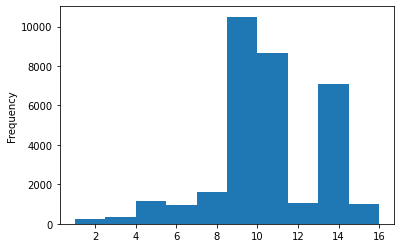

In [11]:
df['education-num'].plot.hist()

<AxesSubplot:>

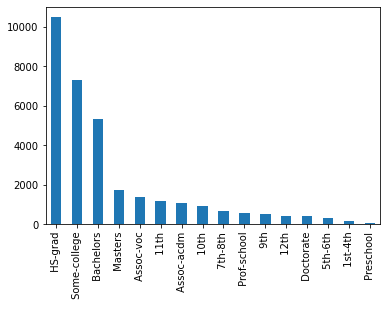

In [10]:
df['education'].value_counts().plot.bar()

<AxesSubplot:xlabel='education'>

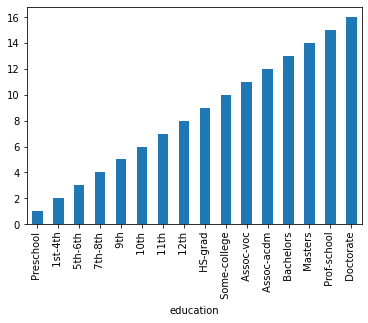

In [66]:
df.groupby(['education'])['education-num'].mean().sort_values().plot.bar()

In [110]:
pd.get_dummies(df[['target', 'education-num']]).corr()

,target,education-num
target,1.000000,0.335154
education-num,0.335154,1.000000


<AxesSubplot:xlabel='education'>

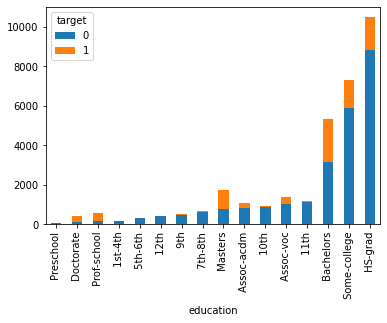

In [34]:
df.groupby(['education', 'target']).size()\
 .reset_index()\
 .pivot_table(columns='target', index='education', values=0)\
 .sort_values(by=0)\
 .plot.bar(stacked=True)

<AxesSubplot:xlabel='education'>

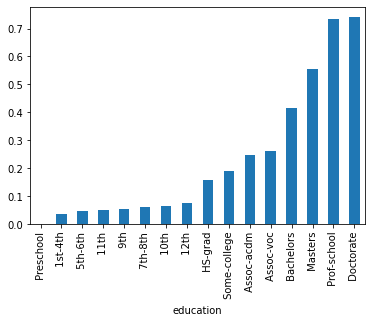

In [32]:
df.groupby('education')['target'].mean().sort_values().plot.bar()

<AxesSubplot:>

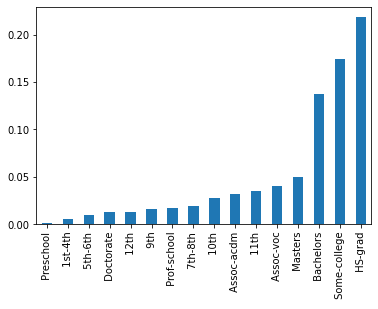

In [37]:
pd.get_dummies(df['education']).var().sort_values().plot.bar()

# Feature Scaling

## The Pandas way

In [79]:
num_features = ['age', 'education-num', 'hours-per-week']

In [80]:
X_num = df[num_features]
scaled_num_df = (X_num - X_num.mean()) / X_num.std()

In [81]:
scaled_num_df

,age,education-num,hours-per-week
0,0.030670,1.134721,-0.035429
1,0.837096,1.134721,-2.222119
2,-0.042641,-0.420053,-0.035429
3,1.057031,-1.197440,-0.035429
4,-0.775756,1.134721,-0.035429
...,...,...,...
32556,-0.849067,0.746028,-0.197406
32557,0.103982,-0.420053,-0.035429
32558,1.423588,-0.420053,-0.035429
32559,-1.215625,-0.420053,-1.655199


In [82]:
scaled_num_df.mean()

age              -4.844461e-17
education-num     1.420605e-16
hours-per-week   -2.836846e-17
dtype: float64

In [83]:
scaled_num_df.std()

age               1.0
education-num     1.0
hours-per-week    1.0
dtype: float64

## Dealing with categorical data

## The Pandas Way

In [69]:
cat_features = ['workclass', 'sex']

In [70]:
one_hot_df = pd.get_dummies(df[cat_features], drop_first=True)

In [72]:
one_hot_df.var().sort_values()

workclass_ Never-worked        0.000215
workclass_ Without-pay         0.000430
workclass_ Federal-gov         0.028615
workclass_ Self-emp-inc        0.033100
workclass_ State-gov           0.038276
workclass_ Local-gov           0.060149
workclass_ Self-emp-not-inc    0.071950
workclass_ Private             0.211186
sex_ Male                      0.221376
dtype: float64

In [77]:
one_hot_df = one_hot_df[one_hot_df.columns[one_hot_df.var() > 0.05]]

# Assemble the data

In [84]:
X = one_hot_df.join(scaled_num_df)
y = df['target']

In [85]:
X.head()

,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-not-inc,sex_ Male,age,education-num,hours-per-week
0,0,0,0,1,0.030670,1.134721,-0.035429
1,0,0,1,1,0.837096,1.134721,-2.222119
2,0,1,0,1,-0.042641,-0.420053,-0.035429
3,0,1,0,1,1.057031,-1.197440,-0.035429
4,0,1,0,0,-0.775756,1.134721,-0.035429


# Fitting a model

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [89]:
model = KNeighborsClassifier(20).fit(Xtrain, ytrain)

In [90]:
model.predict(Xtest.iloc[[0]])

array([1])

In [91]:
# is this right?
ytest.iloc[0]

1

# Evaluate your model

$$ \operatorname{argmin}_\theta \sum_i \left(y - f(x)\right)$$

In [92]:
(model.predict(Xtest) == ytest).mean() # accuracy score

0.8064284983109837

In [93]:
from sklearn import metrics

In [94]:
metrics.accuracy_score(ytest, model.predict(Xtest))

0.8064284983109837

/Users/DIRH/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


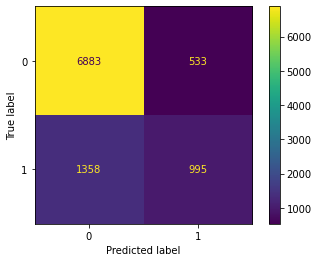

In [95]:
metrics.plot_confusion_matrix(model, Xtest, ytest)

In [96]:
model.predict_proba(Xtest)

array([[0.3 , 0.7 ],
       [0.65, 0.35],
       [0.9 , 0.1 ],
       ...,
       [0.8 , 0.2 ],
       [0.15, 0.85],
       [1.  , 0.  ]])

/Users/DIRH/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


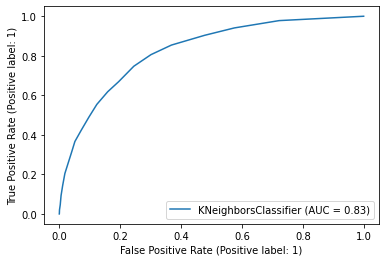

In [97]:
metrics.plot_roc_curve(model, Xtest, ytest)

In [98]:
print(metrics.classification_report(ytest, model.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7416
           1       0.65      0.42      0.51      2353

    accuracy                           0.81      9769
   macro avg       0.74      0.68      0.70      9769
weighted avg       0.79      0.81      0.79      9769



In [100]:
from sklearn.model_selection import cross_val_score

In [103]:
cv = cross_val_score(KNeighborsClassifier(20), X, y, cv=20)

In [104]:
cv.mean()

0.8047976592866096

In [105]:
cv.min()

0.7882136279926335

In [106]:
cv.max()

0.8267813267813268